In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
def get_pts(x,y,theta,dx,dy):
    R = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]])
    p1 = R @ np.array([-dx/2, -dy/2]) + np.array([x, y])
    p2 = R @ np.array([-dx/2, dy/2]) + np.array([x, y])
    p3 = R @ np.array([dx/2, dy/2]) + np.array([x, y])
    p4 = R @ np.array([dx/2, -dy/2]) + np.array([x, y])

    Xpts = [p1[0],p2[0],p3[0],p4[0],p1[0]]
    Ypts = [p1[1],p2[1],p3[1],p4[1],p1[1]]
    xy = np.stack((p1,p2,p3,p4))

    return Xpts, Ypts, xy

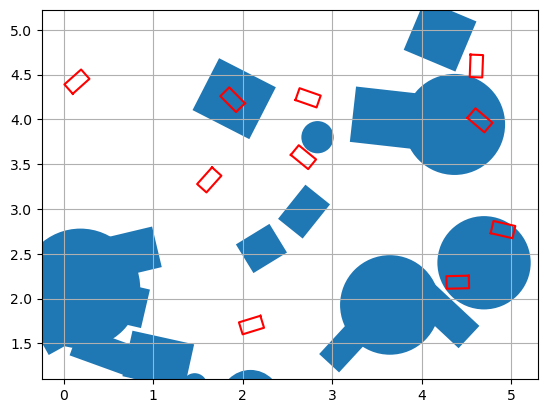

In [3]:
ENV = "env08"

fig, ax = plt.subplots()
with open(ENV+'_bots.txt') as f:
    #lines = [line.rstrip() for line in f]
    for line in f:
        s=line.rstrip().split("=")[1].split(",")
        x,y,theta,dx,dy=float(s[0]),float(s[1]),float(s[2]),float(s[3]),float(s[4])
        Xpts, Ypts, _ = get_pts(x,y,theta*np.pi/180,dx,dy)
        ax.plot(Xpts, Ypts, color="red") 

with open(ENV+'.txt') as f:
    #lines = [line.rstrip() for line in f]
    for line in f:
        s=line.rstrip().split("=")[1].split(",")    
        type,x,y,theta = s[1],float(s[2]),float(s[3]),float(s[4])
        if type == "'circle'":
            rad = float(s[5])
            circle = plt.Circle((x,y),rad)
            ax.add_patch(circle)
        else:
            dx,dy = float(s[5]),float(s[6])
            _,_,xy = get_pts(x,y,theta*np.pi/180,dx,dy)
            rectangle = plt.Polygon(xy, closed=True)
            ax.add_patch(rectangle)            

ax.set_aspect('equal', adjustable='datalim')
ax.grid(visible=True)
plt.show()

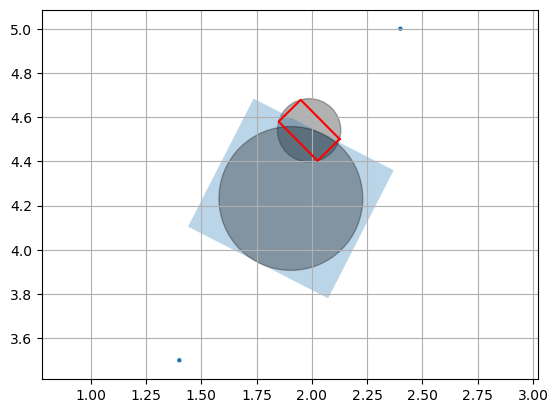

no inclusion


In [65]:
fig, ax = plt.subplots(1,1)
circle = plt.Circle((1.4,3.5),0.01)
ax.add_patch(circle)
circle = plt.Circle((2.4,5.),0.01)
ax.add_patch(circle)

# Bot
x1,y1,theta1,dx,dy = 1.8871353745583763+0.1,4.220270416524906+0.32,134.73562156022643,0.25,0.14
BotC2 = np.linalg.norm((dx,dy))/2
X1pts, Y1pts, xy1 = get_pts(x1,y1,theta1*np.pi/180,dx,dy)
C2 = plt.Circle((x1,y1),BotC2,color="black", alpha = 0.3)
ax.plot(X1pts, Y1pts, color="red") 
ax.add_patch(C2)

# Environment (#08)
x2,y2,theta2,dx,dy = 1.9045656653252645,4.2319791691632505,62.88928999518168,0.6507384692790286,0.7118865431882084
R2C1 = min(dx,dy)/2
X2pts, Y2pts, xy2 = get_pts(x2,y2,theta2*np.pi/180,dx,dy)
rectangle = plt.Polygon(xy2, closed=True, alpha = 0.3)
C1 = plt.Circle((x2,y2),R2C1,color="black", alpha = 0.3)
ax.add_patch(rectangle)  
ax.add_patch(C1)

ax.set_aspect('equal', adjustable='datalim')
ax.grid(visible=True)
plt.show()

# inclusion decision
dist = np.linalg.norm((x2-x1,y2-y1))
if dist+BotC2 < R2C1: print("inclusion")
else: print("no inclusion")


In [66]:
inclusion_flag = []
for P in xy1:
    Vp = np.array([P-xy2[0]])[0]
    V1 = np.array([xy2[1]-xy2[0]])[0]
    V2 = np.array([xy2[-1]-xy2[0]])[0]
    det1 = Vp.dot(V1)
    det2 = Vp.dot(V2)
    if (0<Vp.dot(V1)<V1.dot(V1) and 0<Vp.dot(V2)<V2.dot(V2)): 
        inclusion_flag.append(True)
    else:
        inclusion_flag.append(False)
print(inclusion_flag)

if set(inclusion_flag)=={True} or len(set(inclusion_flag))>1:
    print("clash detected")
elif set(inclusion_flag)=={False}:
    print("No clash")

[False, True, True, False]
clash detected
